In [1]:
import pickle

In [2]:
clf_alc = pickle.load(open('clf_alc_UPDATED.p', 'rb'))

In [6]:
clf_alc.steps[0][1].transformer_list

[('text',
  Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=71233, min_df=1,
          ngram_range=(2, 5), norm='l2', preprocessor=None, smooth_idf=True,
          stop_words=None, strip_accents=None, sublinear_tf=False,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
          vocabulary=None))]))]

In [69]:

%%time

from data import DataAccess, LabelGetter

X = DataAccess.get_not_labeled()

Wall time: 2min 11s


In [70]:
%%time
Labeled = DataAccess.get_as_dataframe()
L = LabelGetter(Labeled)

Wall time: 1.63 s


In [40]:
Labeled[Labeled.predict>0.9].head()

,created_at,labels,predict,text,user,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.statuses_count,user.verified
_id,,,,,,,,,,,
556fcf42d6dfbb18aa7dbbd5,Thu Jun 04 04:09:11 +0000 2015,"{'first_person_level': 1, 'first_person': 1, '...",0.912811,I'mma get drunk tomorrow,"{'friends_count': 1301, 'followers_count': 229...",Fri Jun 24 03:13:44 +0000 2011,1352,2293,1301,74362,False
55711a08d6dfbb62ba96dc0c,Fri Jun 05 03:40:30 +0000 2015,"{'raw': 'Alcohol Related::Discussion', 'alcoho...",0.915949,Yeah JR drunk,"{'friends_count': 875, 'followers_count': 1624...",Fri Aug 31 21:52:32 +0000 2012,2959,1624,875,62069,False
5571dfc6d6dfbb1e027878d5,Fri Jun 05 17:44:12 +0000 2015,"{'first_person': 1, 'alcohol': 1, 'first_perso...",0.935561,I got drunk off of one beer and one mojito las...,"{'friends_count': 214, 'followers_count': 224,...",Wed Dec 09 23:33:33 +0000 2009,7228,224,214,9191,False
5572447ad6dfbb440ea6c739,Sat Jun 06 00:53:53 +0000 2015,"{'first_person_level': 1, 'first_person': 1, '...",0.909894,I guess imma get drunk tonight 😈,"{'friends_count': 1329, 'followers_count': 174...",Sat Aug 29 08:03:08 +0000 2009,1462,1749,1329,63996,False
5573cbdbd6dfbb5bc86e3da7,Sun Jun 07 04:43:46 +0000 2015,"{'first_person': 1, 'alcohol': 1, 'first_perso...",0.917836,Now I'm just chilling drinking a beer lol,"{'friends_count': 436, 'followers_count': 411,...",Fri Oct 14 17:12:54 +0000 2011,212,411,436,11938,False


In [17]:
clf_alc.fit(*L.get_alcohol())

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=T...one,
          solver='liblinear', tol=0.000655077907893521, verbose=0,
          warm_start=None))])

In [18]:
pickle.dump(clf_alc, open('clf_alc_UPDATED.p', 'wb'))

In [19]:
X.head()
X.shape

(76606, 4)

In [20]:
sample = X[X.random_number <0.05]
sample.shape

(9504, 4)

In [21]:
%%time
predictions_alc = clf_alc.predict_proba(sample)

Wall time: 7.18 s


In [27]:
import numpy as np
np.set_printoptions(suppress=True)
predictions_alc

array([[ 0.48240235,  0.51759765],
       [ 0.00042371,  0.99957629],
       [ 0.43185756,  0.56814244],
       ..., 
       [ 0.9817936 ,  0.0182064 ],
       [ 0.99814248,  0.00185752],
       [ 0.67729692,  0.32270308]])

In [24]:
predictions_alc.shape

(9504, 2)

In [56]:
predictions_alc[predictions_alc[:, 1]<0.3].shape

(6158, 2)

In [61]:
import matplotlib.pylab as plt
import matplotlib as m
%matplotlib inline

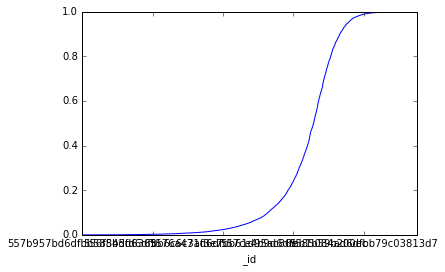

In [83]:
sample.sort_values('new_prob')['new_prob'].plot()

In [2]:
import pandas as pd

In [2]:
import pickle

In [53]:
clf_alc = pickle.load(open('clf_alc_UPDATED.p', 'rb'))

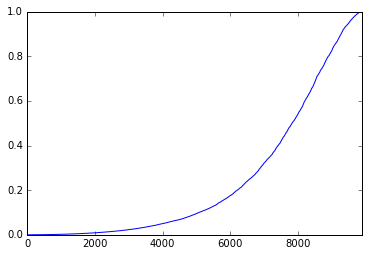

In [102]:
random_tweets.predict.sort_values().plot(use_index=False) # this curve doesn't mean anything

In [46]:
%%time
folder = 'C:/Users/Tom Work/PycharmProjects/nyu-twipsy/tweets_split'
more_tweets = pd.read_csv(folder + '/tweets_1.csv', encoding='utf8').dropna()

Wall time: 855 ms


In [47]:
more_tweets.shape

(50000, 3)

In [51]:
more_tweets.sample(20)

,text,id,created_at
20234,I want a relationship like Red and Kitty Forman.,605987456035389440,Wed Jun 03 06:40:42 +0000 2015
13893,What if The Weeknd never called when it's half...,605931801790414848,Wed Jun 03 02:59:33 +0000 2015
4583,"""ticket policy"" are two words this news produc...",605846056299945986,Tue Jun 02 21:18:50 +0000 2015
5098,Happy 4th birthday to my baby salon! #TheVinta...,605851107567353856,Tue Jun 02 21:38:54 +0000 2015
17467,💯💸🔫⛽️🔥💨 http://t.co/uvqy0mCKqv,605957481307570176,Wed Jun 03 04:41:36 +0000 2015
48796,What am I gonna do this morning?,606462808780251136,Thu Jun 04 14:09:35 +0000 2015
15475,"@_HumblyBlessed_ prolli, if the rain not drawlin",605942538839531520,Wed Jun 03 03:42:13 +0000 2015
1306,"Shooting ""aerial"" product groupings on a ladde...",605812114112970753,Tue Jun 02 19:03:58 +0000 2015
12472,now I'm crying 😞,605922300794273792,Wed Jun 03 02:21:48 +0000 2015
17820,@bryana___ 😂😂😂,605960296000192512,Wed Jun 03 04:52:47 +0000 2015


In [54]:
%%time
predictions_alc = clf_alc.predict_proba(more_tweets)

Wall time: 22.5 s


In [55]:
predictions_alc.shape

(50000, 2)

In [145]:
predictions_alc

array([[ 0.01173895,  0.98826105],
       [ 0.00108324,  0.99891676],
       [ 0.11954757,  0.88045243],
       ..., 
       [ 0.76219337,  0.23780663],
       [ 0.29797369,  0.70202631],
       [ 0.68759509,  0.31240491]])

In [56]:
more_tweets.head()

,text,id,created_at
0,My #TeenChoice nominee for #ChoiceComedyTVShow...,605797899734126593,Tue Jun 02 18:07:29 +0000 2015
1,Jammin to 93.5 kdaaaayy🌞,605797907166470144,Tue Jun 02 18:07:30 +0000 2015
2,#ricobenes #breadedsteak #sandwich with #chees...,605797910555430912,Tue Jun 02 18:07:31 +0000 2015
3,Almost got in my feelings @DAREALQUILLY said t...,605797921720664065,Tue Jun 02 18:07:34 +0000 2015
4,Matty😋😋😋 https://t.co/mYRdYeBkUC,605797933833814016,Tue Jun 02 18:07:37 +0000 2015


In [57]:
more_tweets['predict'] = predictions_alc[:,1]

In [58]:
more_tweets.head()

,text,id,created_at,predict
0,My #TeenChoice nominee for #ChoiceComedyTVShow...,605797899734126593,Tue Jun 02 18:07:29 +0000 2015,0.260429
1,Jammin to 93.5 kdaaaayy🌞,605797907166470144,Tue Jun 02 18:07:30 +0000 2015,0.013377
2,#ricobenes #breadedsteak #sandwich with #chees...,605797910555430912,Tue Jun 02 18:07:31 +0000 2015,0.107127
3,Almost got in my feelings @DAREALQUILLY said t...,605797921720664065,Tue Jun 02 18:07:34 +0000 2015,0.044063
4,Matty😋😋😋 https://t.co/mYRdYeBkUC,605797933833814016,Tue Jun 02 18:07:37 +0000 2015,0.615999


In [59]:
likely = more_tweets[more_tweets.predict > 0.9]

In [60]:
likely.sample(20)

,text,id,created_at,predict
20511,The one night my parents are out of town all m...,605991864265641984,Wed Jun 03 06:58:13 +0000 2015,0.938948
11066,"If I invite you to the spot, I invited you to ...",605912266450411520,Wed Jun 03 01:41:56 +0000 2015,0.950344
21312,18 days til my best beotch touchdown,606012214143680512,Wed Jun 03 08:19:05 +0000 2015,0.974227
44784,Hahah I forgot about what I was supposed to be...,606347604390211584,Thu Jun 04 06:31:48 +0000 2015,0.964362
41947,there are two drunk blackhawks fans on this tr...,606317264686583808,Thu Jun 04 04:31:15 +0000 2015,0.987225
42667,You were never worth my tears.,606322946966065152,Thu Jun 04 04:53:50 +0000 2015,0.918678
15331,@Michael5SOS I love you (: x,605941693523705856,Wed Jun 03 03:38:52 +0000 2015,0.950564
8391,That's lowkey diddy https://t.co/baQCxjO916,605891274705534976,Wed Jun 03 00:18:31 +0000 2015,0.984566
2325,@FBallGameplan I agree. Had really good feet f...,605822976139755520,Tue Jun 02 19:47:07 +0000 2015,0.952283
37679,Allll I do is observe,606271132774236160,Thu Jun 04 01:27:56 +0000 2015,0.967371


In [61]:
likely.shape

(4561, 4)

In [62]:
more_tweets.predict.sort_values().plot(use_index=False)

In [63]:
percentile_98=more_tweets.predict.sort_values().iloc[int(len(more_tweets)*0.98)]
percentile_98

0.98373447741906717

In [64]:
unsure = more_tweets[(0.4 < more_tweets.predict) & (more_tweets.predict < 0.6)]

In [65]:
unsure.shape

(5610, 4)

In [66]:
unsure.sample(10)

,text,id,created_at,predict
2828,I don't even know why me and certain. People a...,605828558217355266,Tue Jun 02 20:09:18 +0000 2015,0.443429
23839,"@PatInKent He needs his manager, who played th...",606097844450295808,Wed Jun 03 13:59:21 +0000 2015,0.511344
5563,everyone pray franco makes it on snapchats sto...,605855799034773504,Tue Jun 02 21:57:33 +0000 2015,0.498186
31834,@LeahRemini @apangelo \r\nNON-CITIZEN BRITNEY ...,606197193616166912,Wed Jun 03 20:34:08 +0000 2015,0.420450
1046,Bailee or Brice? 😂👧👦 http://t.co/H4mdV0D7Ad,605808979952824320,Tue Jun 02 18:51:30 +0000 2015,0.550736
45800,Goldfish crackers are just Cheez-It's in a fis...,606365775041937411,Thu Jun 04 07:44:01 +0000 2015,0.554078
28359,@Tube8 I bet u tried that🍌🍒,606157559930732544,Wed Jun 03 17:56:38 +0000 2015,0.422552
37409,@airbagged @GrantWhitlock he cried when me and...,606265567390101504,Thu Jun 04 01:05:49 +0000 2015,0.508836
14966,Selling 3 Smite Beta Codes for $1 lmk,605939424606552064,Wed Jun 03 03:29:51 +0000 2015,0.433669
29419,@CMPunk A+ nerding going on here.,606170262640427009,Wed Jun 03 18:47:07 +0000 2015,0.597118


In [67]:
more_tweets[more_tweets.predict > 0.75].sample(10)

,text,id,created_at,predict
18824,Everything is always my fault,605970479329984512,Wed Jun 03 05:33:15 +0000 2015,0.984528
2921,Lets get caught in the moment,605829484822945792,Tue Jun 02 20:12:59 +0000 2015,0.936849
19974,Tekk got me fucked up,605983907457155072,Wed Jun 03 06:26:36 +0000 2015,0.935902
31275,Still stuck on the fact that this the weakest ...,606190846342340608,Wed Jun 03 20:08:54 +0000 2015,0.950978
32384,Argumentum ad populum,606202740457533442,Wed Jun 03 20:56:10 +0000 2015,0.896762
40665,It's just buckets. Finally. Chip #1. We earned...,606306710005948416,Thu Jun 04 03:49:18 +0000 2015,0.787775
38393,@laurynacquilano http://t.co/DoDNJKxrF0,606285639168991234,Thu Jun 04 02:25:35 +0000 2015,0.897092
13316,Fuck up some shit,605927992741593089,Wed Jun 03 02:44:25 +0000 2015,0.816293
13107,@Ohana_ilyich @kaaarlj @monbonnz ouch,605926545270513664,Wed Jun 03 02:38:40 +0000 2015,0.838487
12286,@D_Biedermann I call dibs,605920929873412098,Wed Jun 03 02:16:21 +0000 2015,0.959141


In [166]:
clf_alc.steps[0][1]

FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=71233, min_df=1,
   ...      token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None))]))],
       transformer_weights=None)

In [68]:
very_likely = more_tweets[more_tweets.predict> percentile_98]
print(very_likely.shape)
very_likely.sample(20)

(999, 4)


,text,id,created_at,predict
42615,@_faster_than_ya Solomon is a beast WR and saf...,606322516055851009,Thu Jun 04 04:52:07 +0000 2015,0.999439
5436,@World Now isn't that down home and earthly ...,605854340050382848,Tue Jun 02 21:51:45 +0000 2015,0.991970
41166,Dont get lost!,606311497975742464,Thu Jun 04 04:08:20 +0000 2015,0.987025
23001,@ShariseNeil ur baby daddy is a dick. I feel s...,606081597234806784,Wed Jun 03 12:54:47 +0000 2015,0.995002
27182,Im irritated af &amp; been ready to smack some...,606144682305945601,Wed Jun 03 17:05:28 +0000 2015,0.996291
43395,"Also, nothing, just nothing beats a student te...",606330963371524096,Thu Jun 04 05:25:41 +0000 2015,0.995876
38495,watching all my videos from Statesboro makes m...,606286343157739520,Thu Jun 04 02:28:23 +0000 2015,0.983821
6524,@lanceaperkins I would just like to let you kn...,605874174507114496,Tue Jun 02 23:10:34 +0000 2015,0.988851
37790,"Oh my god, the beer tonight.....",606273369382785024,Thu Jun 04 01:36:49 +0000 2015,0.999985
49014,Stupid hoe,606465977761415168,Thu Jun 04 14:22:11 +0000 2015,0.997220
